Problem Statement:
Build a LangGraph where the agent quizzes a user with basic math problems. The agent continues looping and asking questions until either:

The user gets 3 correct answers (exit with “success”),

Or the user gets 2 wrong answers (exit with “fail”).

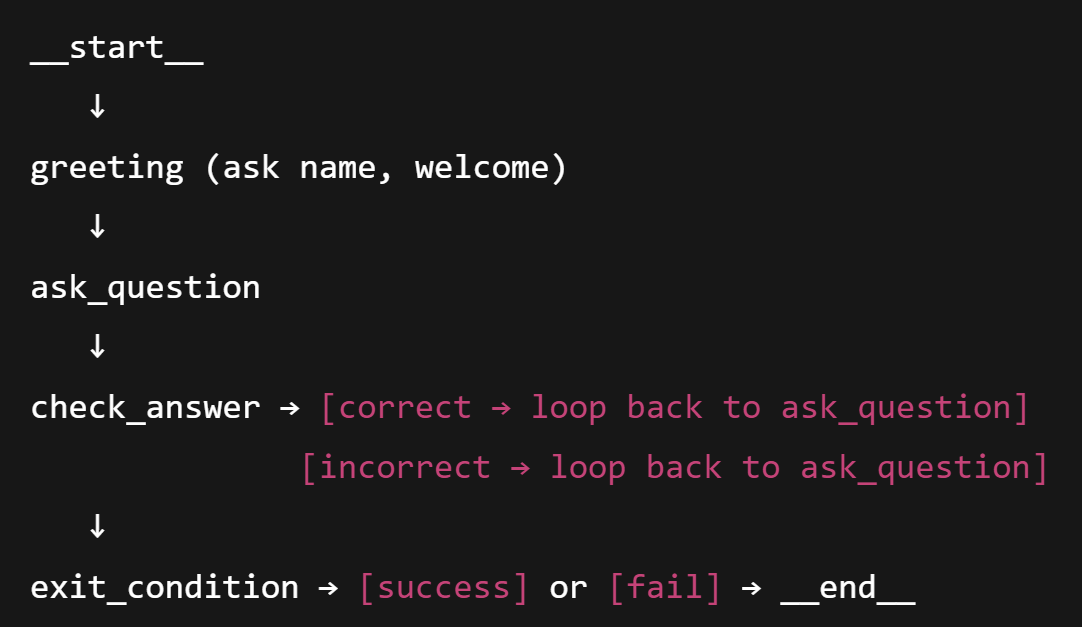





In [ ]:
!pip install langgraph

In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List

In [5]:
import random

In [6]:
class AgentState(TypedDict):
  name: str
  correctAnswer: int
  wrongAnswer: int
  totalQuestions: int
  currentQuestion: str
  userAnswer: str
  score: int
  failure: int

In [7]:
def greeting_node(state: AgentState)-> AgentState:
  state["name"] = f"Hi there, {state['name']}"
  state['score'] = 0
  state['failure'] = 0

  return state


def generate_question_node(state: AgentState)-> AgentState:
  num1 = random.randint(1, 10)
  num2 = random.randint(1, 10)
  state['currentQuestion'] = f"what is {'num1'}+{'num2'}"
  state["correctAnswer"] = num1+num2

  return state

def get_user_answer_node(state: AgentState)-> AgentState:
  state["userAnswer"] = random.randint(1, 20)
  print("user answered: ", state['userAnswer'])

  return state

def check_answer_node(state:  AgentState)-> AgentState:
  if state["userAnswer"] == state["correctAnswer"]:
    state['score']+=1
    print("Correct Answer")
  else:
    state['failure']+=1
    print("Wrong Answer")
  return state

def should_continue(state: AgentState)-> AgentState:
  if state["score"] == 3:
    return "exit_success"
  elif state["failure"] == 2:
      return "exit_fail"
  else:
      return "loop"

def end_node(state: AgentState) -> AgentState:
    print(f"\n{state['name']}, quiz finished!")
    print(f" Score: {state['score']} | Failures: {state['failure']}")
    return state

In [11]:
graph = StateGraph(AgentState)

graph.add_node("greeting",greeting_node)
graph.add_node("generate_question", generate_question_node)
graph.add_node("get_user_answer", get_user_answer_node)
graph.add_node("check_answer", check_answer_node)
graph.add_node("exit_success", end_node)
graph.add_node("exit_fail", end_node)

graph.add_edge(START,"greeting")
graph.add_edge("greeting", "generate_question")
graph.add_edge("generate_question", "get_user_answer")
graph.add_edge("get_user_answer", "check_answer")

graph.add_conditional_edges(
    "check_answer",
    should_continue,
    {
       "loop": "generate_question",
       "exit_success": "exit_success",
       "exit_fail": "exit_fail"
    }
)


graph.add_edge("exit_success",END)
graph.add_edge("exit_fail",END)

app = graph.compile()

In [12]:
initial_state: AgentState = {
    "name": "Ashish",
    "score": 0,
    "failures": 0,
    "current_question": "",
    "correct_answer": 0,
    "answer": None,
}

result= app.invoke(initial_state)

user answered:  5
Wrong Answer
user answered:  12
Wrong Answer

Hi there, Ashish, quiz finished!
 Score: 0 | Failures: 2


In [13]:
from IPython.display import Image, display

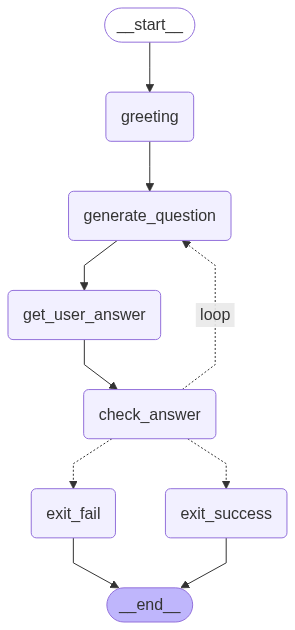

In [14]:
display(Image(app.get_graph().draw_mermaid_png()))